In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
import json

In [4]:
list_fichiers = os.listdir('../data')

In [6]:
data = []
for fic in list_fichiers:
    with open('../data/'+fic, encoding='utf-8') as file:
        da = json.load(file)
        df = pd.DataFrame(da)
        data.append(df)

In [7]:
dataframe = pd.concat(data)
dataframe.head()

,pays,tirs,tirs cadrés,possession,passes,précision des passes,fautes,cartons jaunes,cartons rouge,hors-jeu,corners,journée,date,score,points,butteurs
0,Algérie,13,3,69 %,421,83 %,14,4,0,7,11,2,Dim. 16/01,0,0,
1,Guinée Équatoriale,8,4,31 %,192,60 %,24,4,0,2,3,2,Dim. 16/01,1,3,Esteban Orozco Fernández Obiang Obono 70' ;
0,Algérie,19,8,67 %,493,84 %,14,1,0,2,10,2,Mar. 11/01,0,1,
1,Sierra Leone,10,1,33 %,240,79 %,11,1,0,3,2,2,Mar. 11/01,0,1,
0,Cameroun,14,4,60 %,402,84 %,15,1,0,1,6,2,Dim. 09/01,2,3,"Vincent Aboubakar 40' (P), 45+3' (P) ;"


## Precessing

In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 1
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   pays                  48 non-null     object
 1   tirs                  48 non-null     object
 2   tirs cadrés           48 non-null     object
 3   possession            48 non-null     object
 4   passes                48 non-null     object
 5   précision des passes  48 non-null     object
 6   fautes                48 non-null     object
 7   cartons jaunes        48 non-null     object
 8   cartons rouge         48 non-null     object
 9   hors-jeu              48 non-null     object
 10  corners               48 non-null     object
 11  journée               48 non-null     int64 
 12  date                  48 non-null     object
 13  score                 48 non-null     object
 14  points                48 non-null     int64 
 15  butteurs              48 non-null     objec

In [10]:
dataframe.columns

Index(['pays', 'tirs', 'tirs cadrés', 'possession', 'passes',
       'précision des passes', 'fautes', 'cartons jaunes', 'cartons rouge',
       'hors-jeu', 'corners', 'journée', 'date', 'score', 'points',
       'butteurs'],
      dtype='object')

In [11]:
cols = ['possession', 'précision des passes']
for c in cols:
    dataframe[c] = dataframe[c].str.replace('%', '')

In [13]:
colonnes = ['tirs', 'tirs cadrés', 'possession', 'passes',
       'précision des passes', 'fautes', 'cartons jaunes', 'cartons rouge',
       'hors-jeu', 'corners', 'score', 'points']

for c in colonnes:
    if c in cols:
        dataframe[c] = pd.to_numeric(dataframe[c], downcast='float')
    else:
        dataframe[c] = pd.to_numeric(dataframe[c]) 

In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 1
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pays                  48 non-null     object 
 1   tirs                  48 non-null     int64  
 2   tirs cadrés           48 non-null     int64  
 3   possession            48 non-null     float32
 4   passes                48 non-null     int64  
 5   précision des passes  48 non-null     float32
 6   fautes                48 non-null     int64  
 7   cartons jaunes        48 non-null     int64  
 8   cartons rouge         48 non-null     int64  
 9   hors-jeu              48 non-null     int64  
 10  corners               48 non-null     int64  
 11  journée               48 non-null     int64  
 12  date                  48 non-null     object 
 13  score                 48 non-null     int64  
 14  points                48 non-null     int64  
 15  butteurs              48 n

In [15]:
for c in cols:
    dataframe[c] = dataframe[c]/100

In [16]:
dataframe.head()

,pays,tirs,tirs cadrés,possession,passes,précision des passes,fautes,cartons jaunes,cartons rouge,hors-jeu,corners,journée,date,score,points,butteurs
0,Algérie,13,3,0.69,421,0.83,14,4,0,7,11,2,Dim. 16/01,0,0,
1,Guinée Équatoriale,8,4,0.31,192,0.60,24,4,0,2,3,2,Dim. 16/01,1,3,Esteban Orozco Fernández Obiang Obono 70' ;
0,Algérie,19,8,0.67,493,0.84,14,1,0,2,10,2,Mar. 11/01,0,1,
1,Sierra Leone,10,1,0.33,240,0.79,11,1,0,3,2,2,Mar. 11/01,0,1,
0,Cameroun,14,4,0.60,402,0.84,15,1,0,1,6,2,Dim. 09/01,2,3,"Vincent Aboubakar 40' (P), 45+3' (P) ;"


In [18]:
dataframe.to_csv('../data/match_can_2022.csv', index_label=False, index=False)

In [19]:
df = pd.read_csv('../data/match_can_2022.csv')

In [20]:
df.head()

,pays,tirs,tirs cadrés,possession,passes,précision des passes,fautes,cartons jaunes,cartons rouge,hors-jeu,corners,journée,date,score,points,butteurs
0,Algérie,13,3,0.69,421,0.83,14,4,0,7,11,2,Dim. 16/01,0,0,NaN
1,Guinée Équatoriale,8,4,0.31,192,0.60,24,4,0,2,3,2,Dim. 16/01,1,3,Esteban Orozco Fernández Obiang Obono 70' ;
2,Algérie,19,8,0.67,493,0.84,14,1,0,2,10,2,Mar. 11/01,0,1,NaN
3,Sierra Leone,10,1,0.33,240,0.79,11,1,0,3,2,2,Mar. 11/01,0,1,NaN
4,Cameroun,14,4,0.60,402,0.84,15,1,0,1,6,2,Dim. 09/01,2,3,"Vincent Aboubakar 40' (P), 45+3' (P) ;"


In [22]:
df[df['pays']=='Guinée']

,pays,tirs,tirs cadrés,possession,passes,précision des passes,fautes,cartons jaunes,cartons rouge,hors-jeu,corners,journée,date,score,points,butteurs
20,Guinée,13,4,0.65,420,0.84,11,1,0,1,6,2,Lun. 10/01,1,3,Issiaga Sylla 35' ;
39,Guinée,5,1,0.51,250,0.64,26,4,0,1,7,2,Ven. 14/01,0,1,NaN


In [28]:
df.columns

Index(['pays', 'tirs', 'tirs cadrés', 'possession', 'passes',
       'précision des passes', 'fautes', 'cartons jaunes', 'cartons rouge',
       'hors-jeu', 'corners', 'journée', 'date', 'score', 'points',
       'butteurs'],
      dtype='object')

In [36]:
cols = ['tirs cadrés', 'possession','précision des passes']
stat = df.groupby('pays')[cols].agg(['mean'])

In [40]:
st_tir = stat.iloc[:, 0].sort_values(ascending=False)
st_pos = stat.iloc[:, 1].sort_values(ascending=False)
st_pre = stat.iloc[:, 2].sort_values(ascending=False)

In [41]:
st_tir = st_tir[:12]
st_pos = st_pos[:12]
st_pre = st_pre[:12]

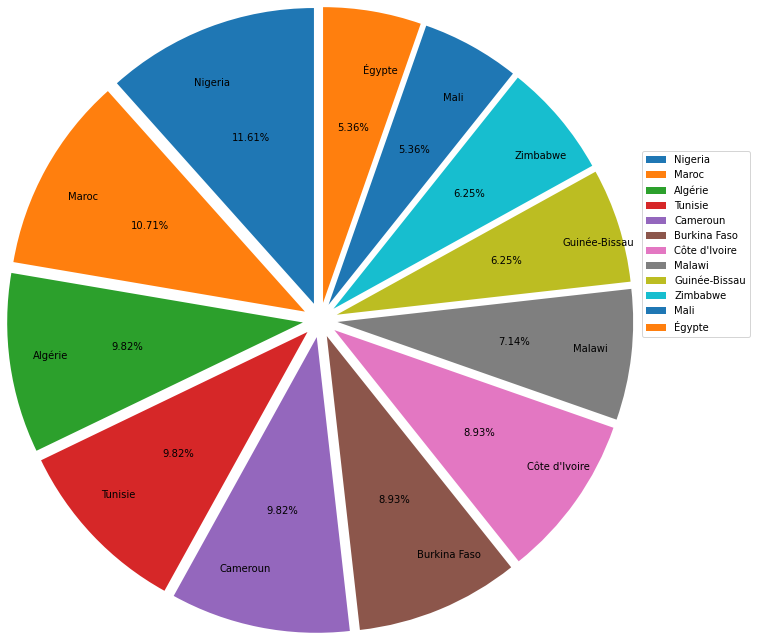

In [78]:
plt.figure(figsize=(16, 8))
k = [0.1 for i in range(len(st_tir))]
plt.pie(st_tir, explode=k, labels=st_tir.index, autopct='%1.2f%%', startangle=90, radius=1.7, labeldistance=0.8 );
# plt.title('Les équipes les plus performantes en terme de tirs cadré')
plt.legend( bbox_to_anchor=(1.5, 0.9) );

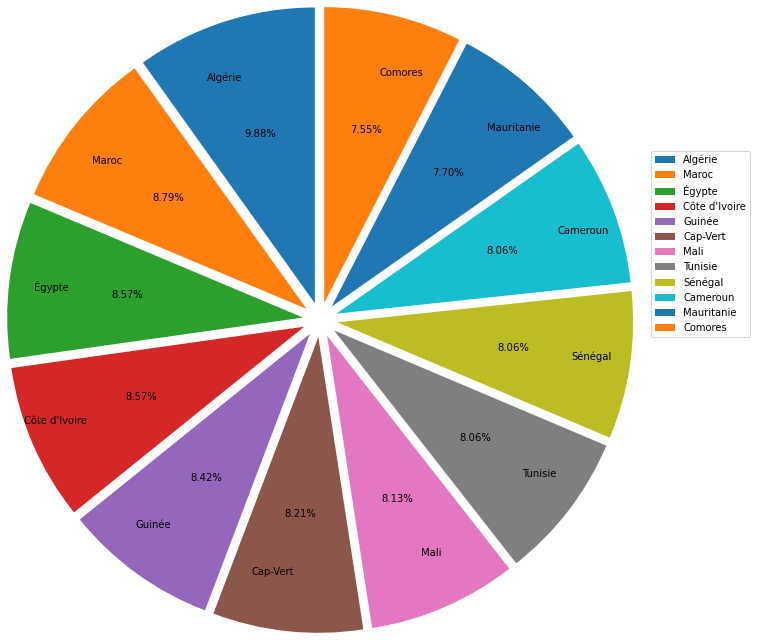

In [79]:
plt.figure(figsize=(16, 8))
k = [0.1 for i in range(len(st_pos))]
plt.pie(st_pos, explode=k, labels=st_pos.index, autopct='%1.2f%%', startangle=90, radius=1.7, labeldistance=0.8 );
# plt.title('Les équipes les plus performantes en terme de tirs cadré')
plt.legend( bbox_to_anchor=(1.5, 0.9) );

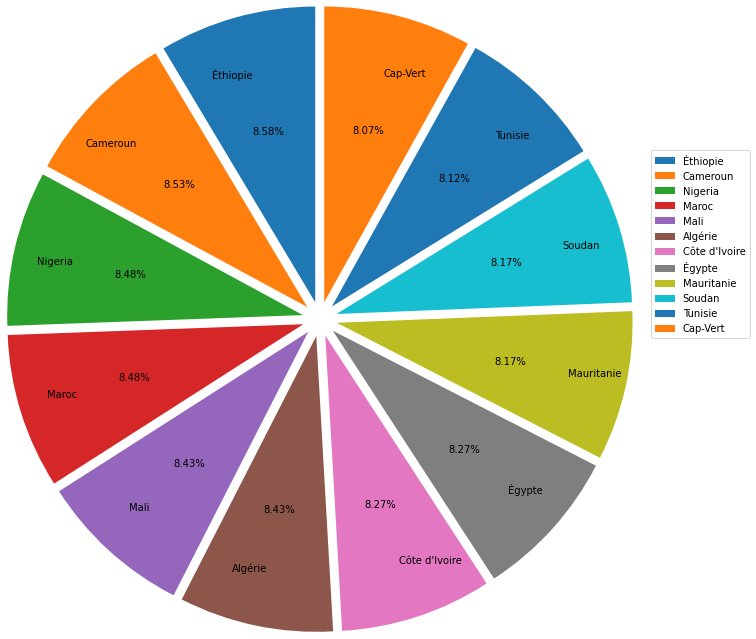

In [80]:
plt.figure(figsize=(16, 8))
k = [0.1 for i in range(len(st_pre))]
plt.pie(st_pre, explode=k, labels=st_pre.index, autopct='%1.2f%%', startangle=90, radius=1.7, labeldistance=0.8 );
# plt.title('Les équipes les plus performantes en terme de tirs cadré')
plt.legend( bbox_to_anchor=(1.5, 0.9) );

In [84]:
pays = set()
for p in df.pays:
    if p in st_tir.index and p in st_pos.index and p in st_pre.index:
        pays.add(p)

In [85]:
pays

{'Algérie', 'Cameroun', "Côte d'Ivoire", 'Mali', 'Maroc', 'Tunisie', 'Égypte'}